
# Cross-Department Model Comparison

This notebook loads the saved model metrics and feature-importances for each department and visualizes:
1. Which models perform best (MAE/MAPE/RMSE) per department.
2. Which feature families dominate for each department.


## Imports & Data Load

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_columns', None)
models_dir = Path('models')
model_files = sorted(models_dir.glob('dept*_model_results.csv'))
importance_files = sorted(models_dir.glob('dept*_feature_importances.csv'))

metrics_df = pd.concat(
    [pd.read_csv(f).assign(dept=f.stem.split('_')[0]) for f in model_files],
    ignore_index=True
)
importance_df = pd.concat(
    [pd.read_csv(f).assign(dept=f.stem.split('_')[0]) for f in importance_files],
    ignore_index=True
)
metrics_df


,model,MAE,MAPE,RMSE,split,model_name,dept
0,naive_val,4.691667,0.100939,6.337218,val,naive,dept41
1,naive_test,4.911458,0.099103,6.975090,test,naive,dept41
2,seasonal7_val,3.950000,0.085156,5.541901,val,seasonal7,dept41
3,seasonal7_test,4.232917,0.085201,6.271829,test,seasonal7,dept41
4,ridge_val,3.114416,0.066264,4.228713,val,ridge,dept41
...,...,...,...,...,...,...,...
95,catboost_test,3.659856,0.065157,5.390531,test,catboost,dept9
96,lgbm_val,3.817678,0.069136,5.811946,val,lgbm,dept9
97,lgbm_test,3.691576,0.065502,5.352924,test,lgbm,dept9
98,xgb_val,3.853356,0.069122,6.026943,val,xgb,dept9


## Top Models per Department

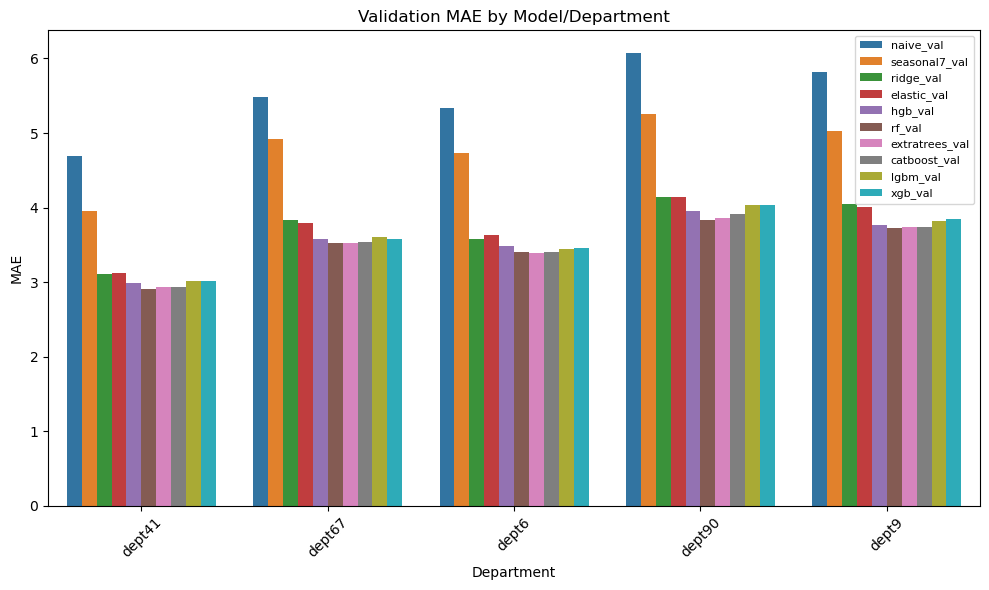

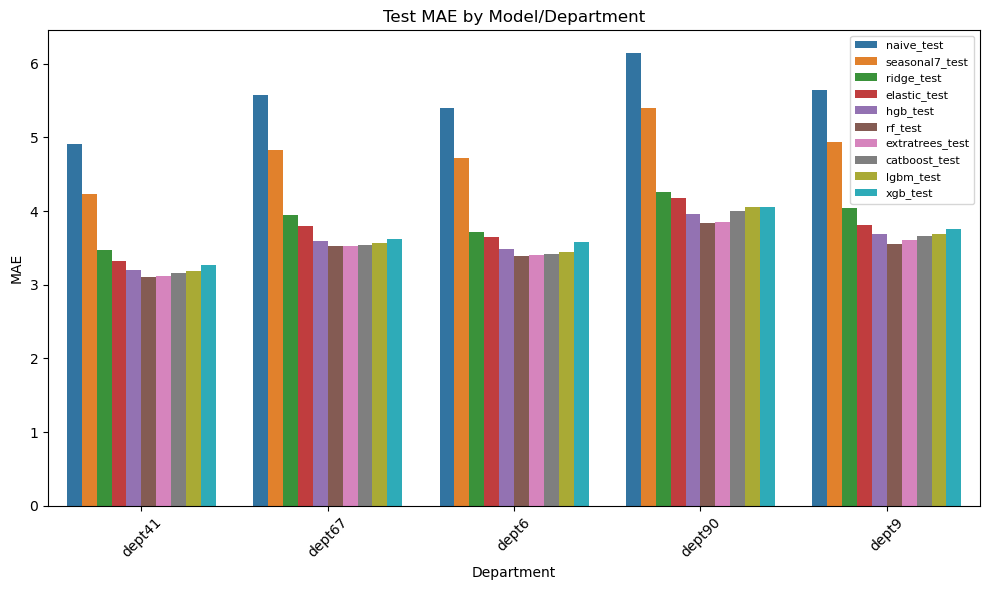

In [2]:

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df[metrics_df['model'].str.contains('_val')], x='dept', y='MAE', hue='model')
plt.title('Validation MAE by Model/Department')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df[metrics_df['model'].str.contains('_test')], x='dept', y='MAE', hue='model')
plt.title('Test MAE by Model/Department')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


## Recommended Models per Department

In [3]:

summary = metrics_df.copy()
summary['split'] = summary['model'].apply(lambda x: 'val' if 'val' in x else 'test')
summary['model_name'] = summary['model'].str.replace('_val','').str.replace('_test','')

best_models = (
    summary.groupby(['dept','split']).apply(lambda df: df.nsmallest(1, 'MAE'))
    .reset_index(drop=True)
    [['dept','split','model_name','MAE','MAPE','RMSE']]
)
best_models


/var/folders/fx/2j6wthvx3ss0j55xgc1txl0m0000gn/T/ipykernel_68458/3304259851.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary.groupby(['dept','split']).apply(lambda df: df.nsmallest(1, 'MAE'))


,dept,split,model_name,MAE,MAPE,RMSE
0,dept41,test,rf,3.107786,0.062920,4.449859
1,dept41,val,rf,2.906596,0.063750,3.912376
2,dept6,test,rf,3.391315,0.064263,4.943293
3,dept6,val,extratrees,3.397378,0.069335,4.868760
4,dept67,test,rf,3.520244,0.063632,5.116287
5,dept67,val,rf,3.519179,0.065891,4.903727
6,dept9,test,rf,3.551345,0.063373,5.132287
7,dept9,val,rf,3.726768,0.067389,5.913054
8,dept90,test,rf,3.844419,0.065088,5.461879
9,dept90,val,rf,3.832206,0.066662,5.392950


## Best Test Model per Department

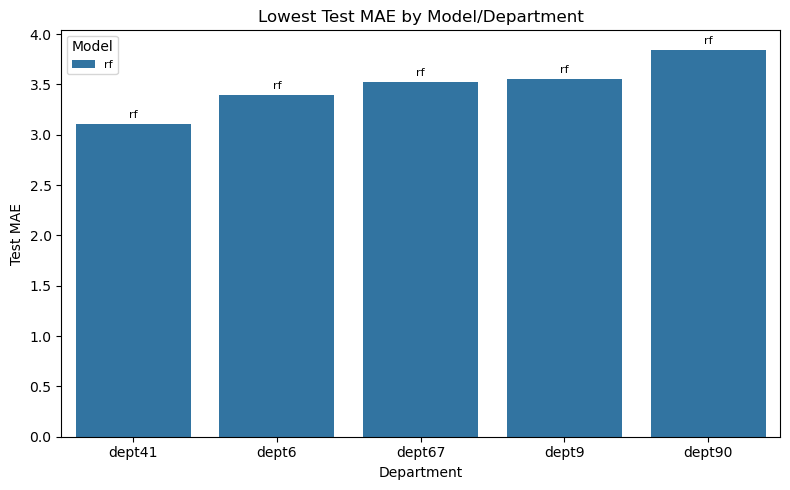

In [4]:
best_test = best_models[best_models['split'] == 'test']
plt.figure(figsize=(8,5))
ax = sns.barplot(data=best_test, x='dept', y='MAE', hue='model_name')
plt.title('Lowest Test MAE by Model/Department')
plt.xlabel('Department')
plt.ylabel('Test MAE')
plt.legend(title='Model', fontsize=8)
for patch, (_, row) in zip(ax.patches, best_test.iterrows()):
    ax.annotate(f"{row['model_name']}",
                (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                ha='center', va='bottom', fontsize=8, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()
